In [104]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("theme_park_injuries.csv")

In [106]:
df = df.drop('Ride_name_dirty', axis=1)

In [107]:

#clean age_gender colummn
df['age_gender'] = df['age_gender'].str.strip()
#create age column by grabbing the age in front(2)
df['Age'] = df['age_gender'].str[:2]
# fix if age only has one digit
df['Age'] = df['Age'].str.strip().astype(int)
#create the gender column by the last latter
df['Gender'] = df['age_gender'].str[-1:]


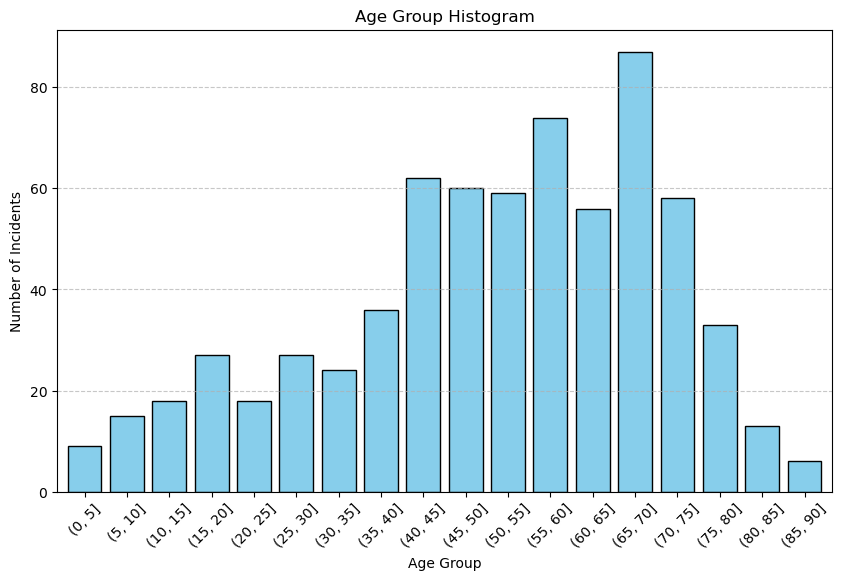

In [108]:
# Create histogram for # of incidents by age

# age bins for hist
age_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

# Create age groups using pd.cut
age_groups = pd.cut(df['Age'], bins=age_bins)

# Calculate the frequency of each age group
age_group_counts = age_groups.value_counts(sort=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue',edgecolor ='black',width=0.8)  
plt.xlabel('Age Group')
plt.ylabel('Number of Incidents')
plt.title('Age Group Histogram')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

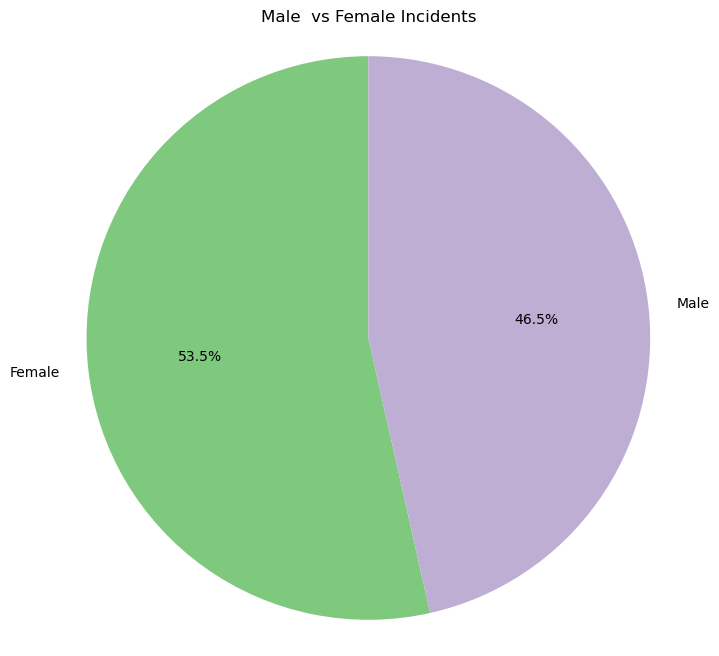

In [111]:
#Chart between gender and number of incidents

# Change the f to Female and the m to Male inside the Gender column
def custom_mapping(value):
    if value == 'f':
        return 'Female'
    elif value == 'm':
        return 'Male'
    else:
        return value
# apply to dataframe    
df['Gender'] = df['Gender'].map(custom_mapping)
# Calculate the frequency of each gender
gender_counts = df['Gender'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Accent.colors)
plt.title('Male  vs Female Incidents')
plt.axis('equal')  
plt.show()